Check the results of the sign candidate algorithm (Hough circle transform) against ground truth

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__
pd.set_option("display.notebook_repr_html", False) #output like matplotlib, not html

In [2]:
df_can = pd.read_csv("../data/interim/170308/dataframes/canon_1837_19295.csv")
df_gar = pd.read_csv("../data/interim/170308/dataframes/garmin_1837_19295.csv")
df_can.head()

   Unnamed: 0     accum         area  base_frame  blue_pix  frac_blue_area  \
0           0  0.517857  14526.72443        3269     10082        0.694031   
1           1  0.510204  14526.72443        3270     10007        0.688868   
2           2  0.436224  14526.72443        3271     10152        0.698850   
3           3  0.482143  14526.72443        3272      9944        0.684531   
4           4  0.479592  14526.72443        3273      9817        0.675789   

   frac_r_y  frac_red_area  frame_num                    id        lat  \
0         0       0.216016       3023  f0003269_x0145_y0374  52.492708   
1         0       0.211403       3024  f0003270_x0194_y0357  52.492709   
2         0       0.199907       3025  f0003271_x0243_y0339  52.492711   
3         0       0.214777       3026  f0003272_x0288_y0323  52.492712   
4         0       0.234051       3027  f0003273_x0336_y0308  52.492714   

         lon  radius  red_pix    x    y  
0  13.353503      68     3138  145  374  
1 

In [3]:
df_lab = pd.read_csv("../data/interim/170308/labelled/no_stopping_signs.csv")
df_lab.head()

   canon_base_frame  sign_no  left_arrow  right_arrow  sign_type  \
0              1700        1           0            1          2   
1              2750        1           1            0          2   
2              3269        1           0            1          2   
3                -1       -1           1            0          2   
4              4953        1           1            0          1   

   has_visible_details  temporary  garmin_base_frame  sign_no.1  angle  
0                    1          1               1861          1      1  
1                    0          1               3174          1      1  
2                    0          1               3293          1      3  
3                    0          0               4784          1      2  
4                    0          0               5329          1      2  

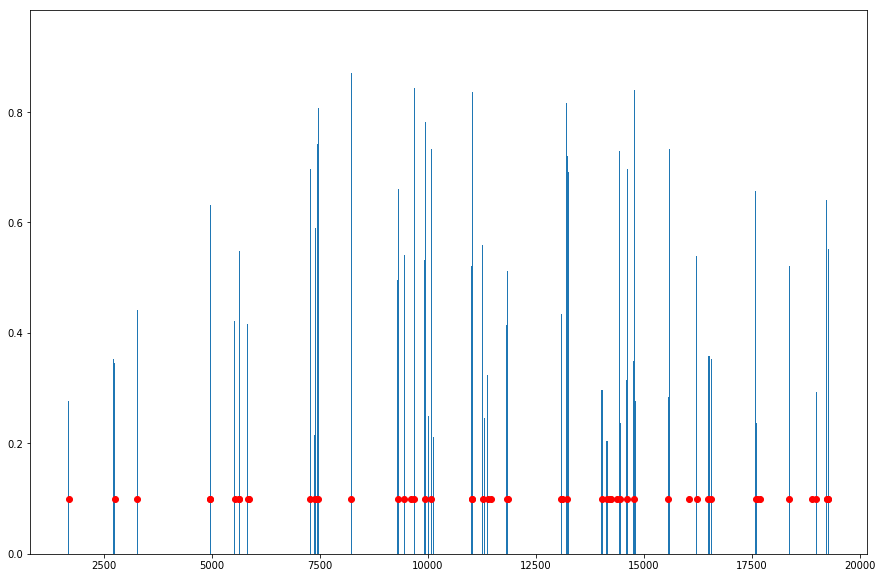

In [4]:
frame_i = 1000
frame_f = 20000
can_cond = (df_can.base_frame > frame_i) & (df_can.base_frame < frame_f)
lab_cond = (df_lab.canon_base_frame > frame_i) & (df_lab.canon_base_frame < frame_f)
plt.figure(figsize=(15,10))
plt.bar(df_can.base_frame[can_cond], df_can.accum[can_cond])
plt.hold
dummy_y = 0.1 * np.ones(df_lab.canon_base_frame[lab_cond].size)
plt.plot(df_lab.canon_base_frame[lab_cond], dummy_y, "ro")

In [5]:
df_can.set_index("base_frame")

            Unnamed: 0     accum          area  blue_pix  frac_blue_area  \
base_frame                                                                 
3269                 0  0.517857  14526.724430     10082        0.694031   
3270                 1  0.510204  14526.724430     10007        0.688868   
3271                 2  0.436224  14526.724430     10152        0.698850   
3272                 3  0.482143  14526.724430      9944        0.684531   
3273                 4  0.479592  14526.724430      9817        0.675789   
3274                 5  0.234375  12867.963509      8700        0.676098   
3275                 6  0.474490  14526.724430      9733        0.670007   
3276                 7  0.456522  12867.963509      8688        0.675165   
3277                 8  0.459239  12867.963509      8400        0.652784   
3278                 9  0.475543  12867.963509      8593        0.667782   
3279                10  0.448370  12867.963509      8370        0.650453   
3280        

In [6]:
df_lab.set_index("canon_base_frame")

                  sign_no  left_arrow  right_arrow  sign_type  \
canon_base_frame                                                
 1700                   1           0            1          2   
 2750                   1           1            0          2   
 3269                   1           0            1          2   
-1                     -1           1            0          2   
 4953                   1           1            0          1   
 4953                   2           0            1          2   
 5536                   1           1            0          2   
 5640                   1           1            0          1   
 5640                   2           0            1          1   
 5832                   1           1            0          1   
 5863                   1           0            1          1   
 7286                   1           1            0          1   
 7381                   1           1            0          2   
 7402                   1

# Canon false negatives (none)

Check false negatives for Canon camera . Plot hough accumulator around each labelled sign. if the red dot fall on (or very near) a blue bar then it has been detected. Plots centred on x=-1 were signs that were not seen with Canon camera (but were with Garmin). Usually because Canon camera was off. Once because a bus was in the way. Once missed making a right turn.

KeyError: 0

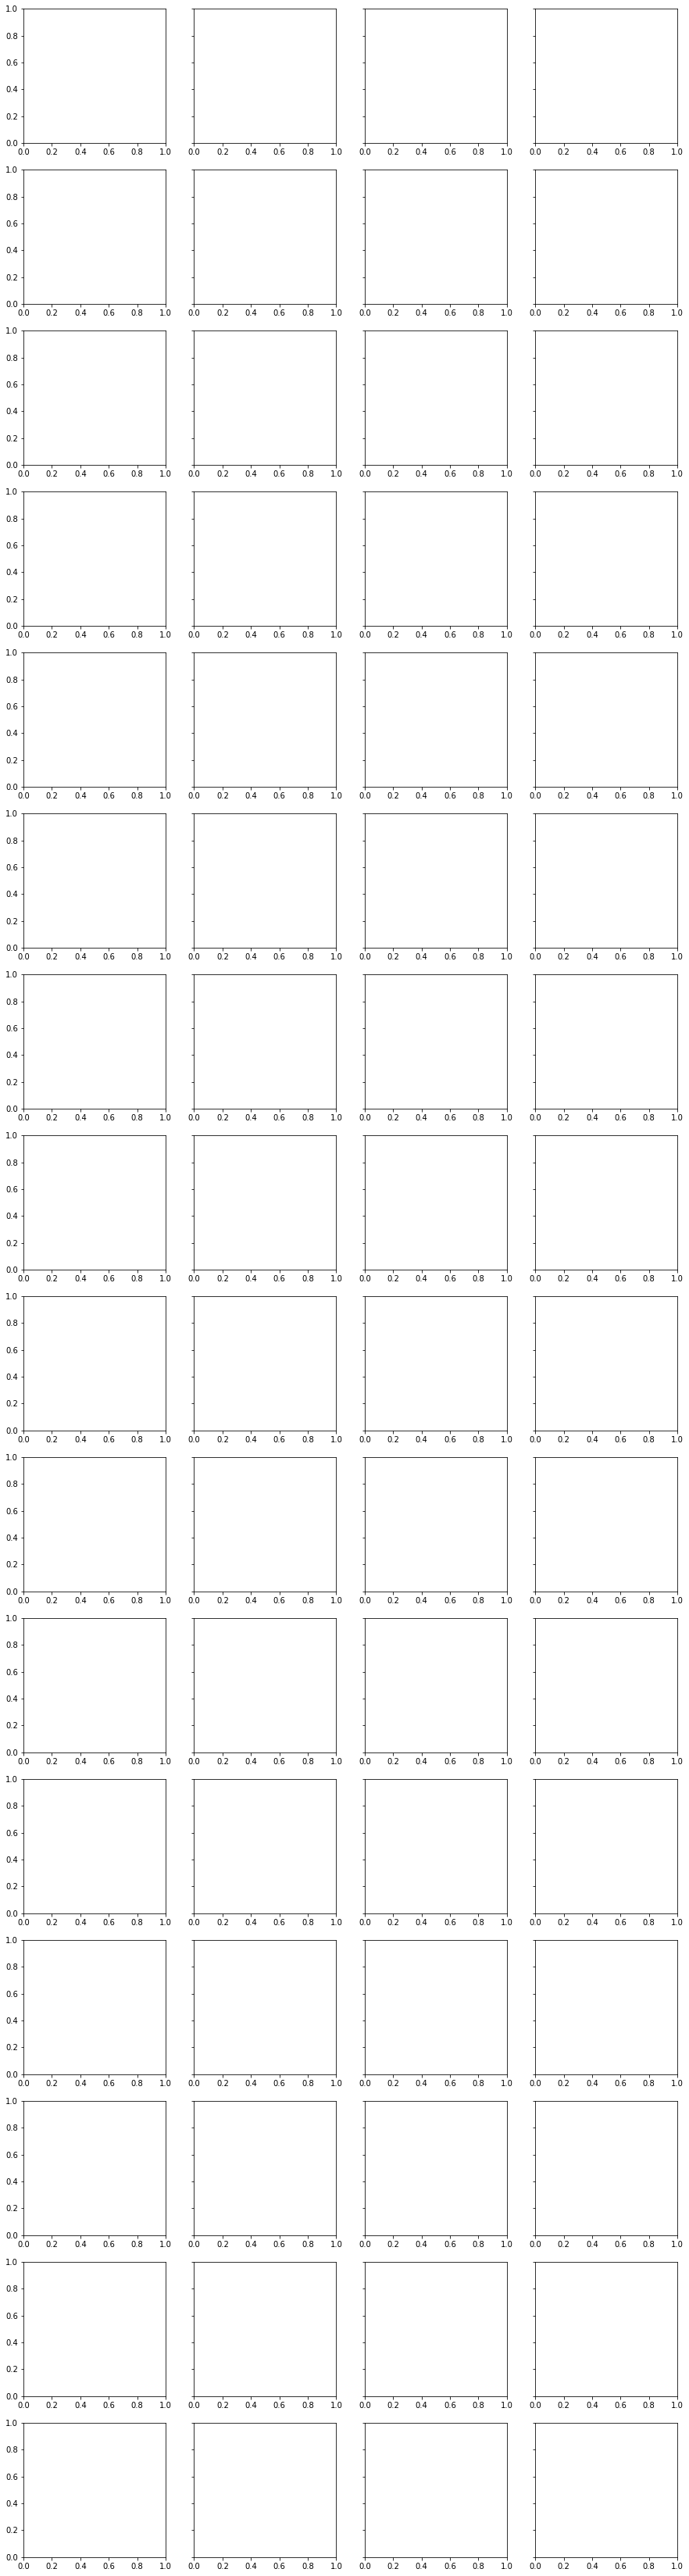

In [7]:
n_plots = float(df_lab.canon_base_frame.size)
n_plots_x = 4
n_plots_y = int(np.ceil(n_plots / n_plots_x))
f, axes = plt.subplots(n_plots_y, n_plots_x, sharey=True, figsize=(15,60))
axes = axes.flatten()
n_frames = 48
for frame, axis in zip(df_lab["canon_base_frame"], axes):
    frame_i = frame - n_frames
    frame_f = frame + n_frames
    can_cond = (df_can.base_frame > frame_i) & (df_can.base_frame < frame_f)
    lab_cond = (df_lab.canon_base_frame > frame_i) & (df_lab.canon_base_frame < frame_f)
    axis.bar(df_can.base_frame[can_cond], df_can.accum[can_cond])
    dummy_y = 0.1 * np.ones(df_lab.canon_base_frame[lab_cond].size)
    axis.plot(df_lab.canon_base_frame[lab_cond], dummy_y, "ro")
    axis.set_xlim([frame_i, frame_f]) 
    axis.set_ylim([0, 1.0]) 
    axis.get_xaxis().get_major_formatter().set_useOffset(False)

    
#plt.tight_layout()

# Garmin false negatives (6 missed)

In [ ]:
n_plots = float(df_lab.garmin_base_frame.size)
n_plots_x = 4
n_plots_y = int(np.ceil(n_plots / n_plots_x))
f, axes = plt.subplots(n_plots_y, n_plots_x, sharey=True, figsize=(15,60))
axes = axes.flatten()
n_frames = 48
for frame, axis in zip(df_lab["garmin_base_frame"], axes):
    frame_i = frame - n_frames
    frame_f = frame + n_frames
    can_cond = (df_gar.base_frame > frame_i) & (df_gar.base_frame < frame_f)
    lab_cond = (df_lab.garmin_base_frame > frame_i) & (df_lab.garmin_base_frame < frame_f)
    axis.bar(df_gar.base_frame[can_cond], df_gar.accum[can_cond])
    dummy_y = 0.1 * np.ones(df_lab.garmin_base_frame[lab_cond].size)
    axis.plot(df_lab.garmin_base_frame[lab_cond], dummy_y, "ro")
    axis.set_xlim([frame_i, frame_f]) 
    axis.set_ylim([0, 1.0]) 
    axis.get_xaxis().get_major_formatter().set_useOffset(False)

    
#plt.tight_layout()

# Check missed Garmin

In [9]:
from sign_detection.data.video_handler import VideoHandler  
video_dir = "../data/raw/170308/video"
gps_path = "../data/raw/170308/gps/170308.GPX"
garmin_handlers = VideoHandler.handlers_from_config(video_dir, "garmin_config.csv", gps_path)    

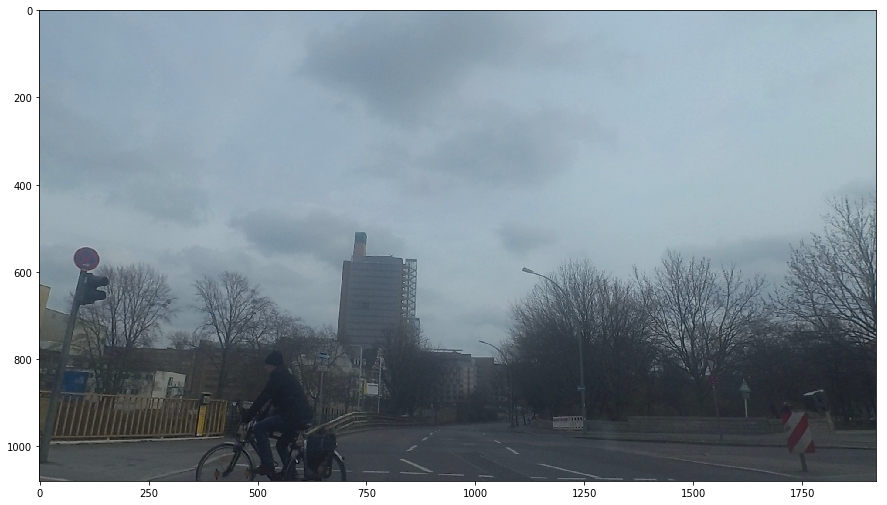

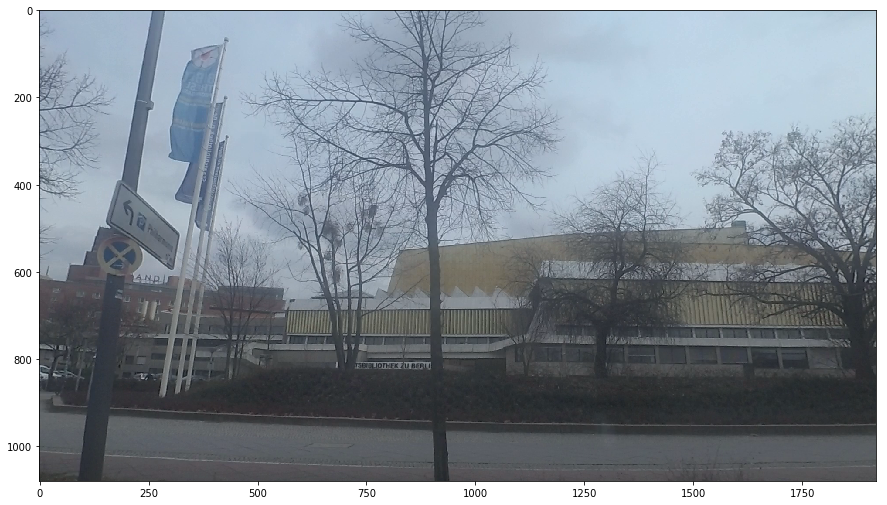

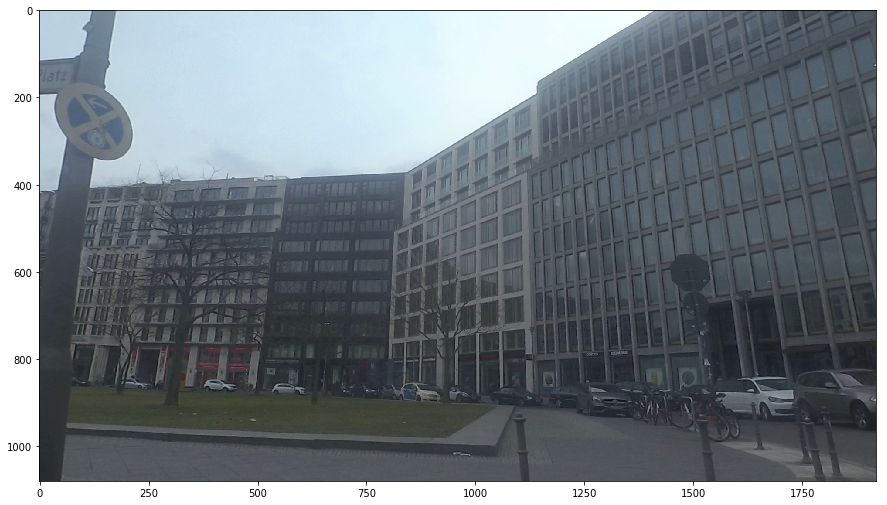

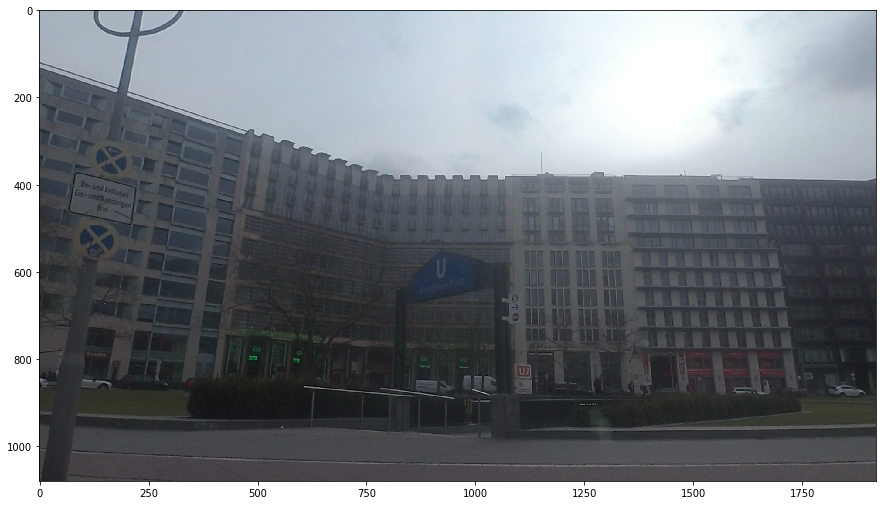

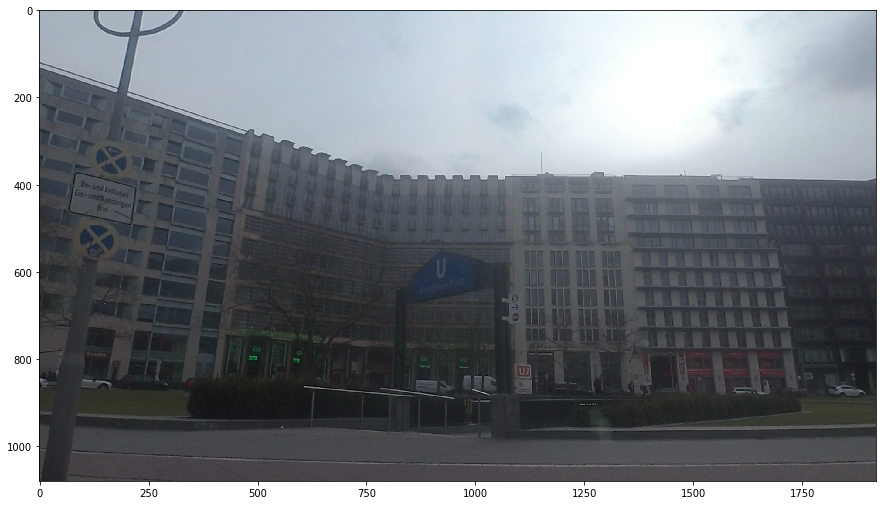

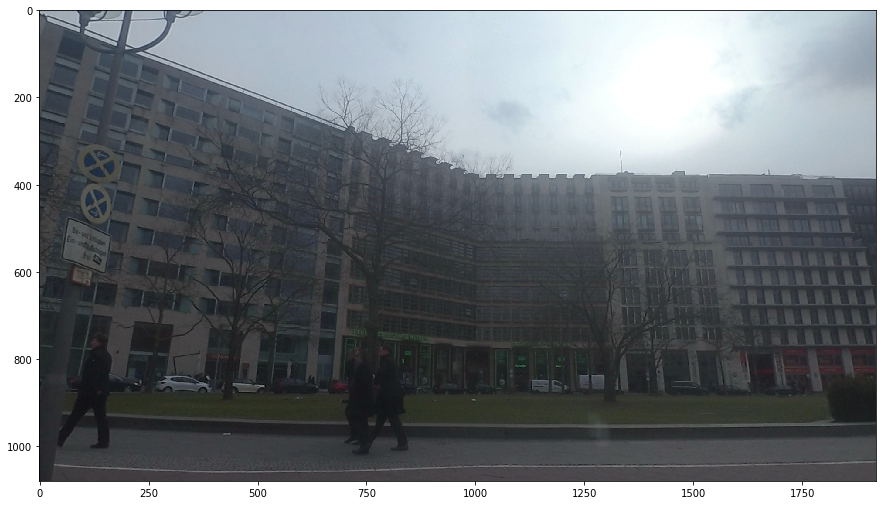

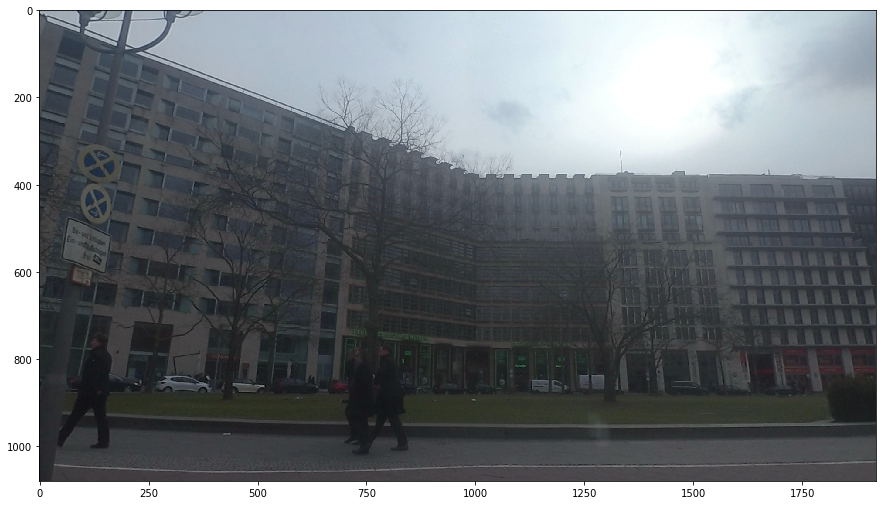

In [12]:
import cv2
missed_frames = [15604, 16238, 19006, 19246, 19246, 19290, 19290]
for frame in missed_frames:
    vh = VideoHandler.get_handler(garmin_handlers, frame)  
    img = vh.get_frame(frame) 
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Missed images are mostly very pale red